In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 
import pandas as pd
import cv2 as cv2
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
dataset = "C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets"
Train_path = "C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train"
Test_path = r"C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\Datasets\ASL_datasets\asl-alphabet-test"

In [3]:
dirls = os.listdir(Train_path)
print(dirls)
val = Train_path + '\\'+dirls[0]
print(val)


['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C://Users//R1007398//Downloads//Books_AIML//Innomatics//CV//CNN//Codes//Datasets//ASL_datasets//asl-alphabet-train\A


In [4]:
def loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = Train_path + "\\"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes)   

In [5]:
paths, classes = loading_images(Train_path)

In [6]:
def labeling_images(unique_paths, unique_classes):
    img_paths =[]
    labels = []
    for path, label in zip(unique_paths, unique_classes):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + "\\" + i
            img_paths.append(img_dir_list)
            labels.append(label)
    return(img_paths, labels)
    

In [7]:
img_paths , labels = labeling_images(paths, classes)

In [8]:
print(img_paths.__len__())
print(labels.__len__())

870
870


<class 'numpy.ndarray'>


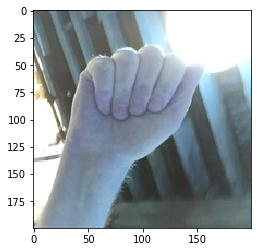

In [9]:
img = cv2.imread(img_paths[0])
print(type(img))
plt.imshow(img)

In [15]:
def image_array(paths):
    arr_list =[]
    for i in paths:
        img = cv2.resize(cv2.imread(i), (64, 64))
        arr_list.append(img)
    return(arr_list)
        

<class 'numpy.ndarray'>


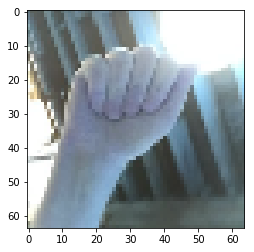

In [16]:
labels = np.array(labels)
arr_img = image_array(img_paths)
arr_img = np.array(arr_img)
print(type(arr_img[0]))
plt.imshow(arr_img[0])


In [17]:
X_train, X_test, y_train, y_test = train_test_split(arr_img, labels, test_size = 0.2)


train_n = len(X_train)
test_n = len(X_test)

print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)
#print(X_test)

Number of training images:  696
Number of testing images:  174


In [18]:
from sklearn.preprocessing import OneHotEncoder
vals = OneHotEncoder()
unq_labes  = np.unique(y_train)
oneHotLabels = vals.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_labs = vals.fit_transform(y_test.reshape(-1,1)).toarray()

In [19]:
X_train.__len__()
print(oneHotLabels.__len__())
print(y_test_labs.__len__())

696
174


In [20]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

In [21]:
model.compile(loss='categorical_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
hist = model.fit(X_train,oneHotLabels,  batch_size =32, validation_split = 0.3, epochs=5, verbose=1)

C:\Users\R1007398\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
16/16 [==============================] - 19s 1s/step - loss: 1531.8351 - accuracy: 0.0308 - val_loss: 3.3689 - val_accuracy: 0.0287
Epoch 2/5
16/16 [==============================] - 19s 1s/step - loss: 3.3659 - accuracy: 0.0411 - val_loss: 3.3727 - val_accuracy: 0.0287
Epoch 3/5
16/16 [==============================] - 20s 1s/step - loss: 3.3640 - accuracy: 0.0411 - val_loss: 3.3771 - val_accuracy: 0.0287
Epoch 4/5
16/16 [==============================] - 18s 1s/step - loss: 3.3620 - accuracy: 0.0390 - val_loss: 3.3804 - val_accuracy: 0.0144
Epoch 5/5
16/16 [==============================] - 19s 1s/step - loss: 3.3606 - accuracy: 0.0472 - val_loss: 3.3845 - val_accuracy: 0.0144


In [ ]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
